<a href="https://colab.research.google.com/github/TristanMons/Ma-512---Final-Project/blob/main/ClimateTextClassification_Legrand_Monsellier_Vinatier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Climate change Text Classification

In [1]:
import pandas as pd
import json
import urllib.request # Import the urllib.request module

# URL of the JSONL file
url = "https://www.sustainablefinance.uzh.ch/dam/jcr:df02e448-baa1-4db8-921a-58507be4838e/climate-fever-dataset-r1.jsonl"

# Function to read the JSONL file line by line
def read_jsonl_from_url(url):
    data = []
    with urllib.request.urlopen(url) as response:
        for line in response:
            data.append(json.loads(line.decode('utf-8')))
    return data

# Load the data into a pandas DataFrame
df = pd.DataFrame(read_jsonl_from_url(url))

In [2]:
# Display the DataFrame
df.head()

,claim_id,claim,claim_label,evidences
0,0,Global warming is driving polar bears toward e...,SUPPORTS,[{'evidence_id': 'Extinction risk from global ...
1,5,The sun has gone into ‘lockdown’ which could c...,SUPPORTS,"[{'evidence_id': 'Famine:386', 'evidence_label..."
2,6,The polar bear population has been growing.,REFUTES,"[{'evidence_id': 'Polar bear:1332', 'evidence_..."
3,9,Ironic' study finds more CO2 has slightly cool...,REFUTES,"[{'evidence_id': 'Atmosphere of Mars:131', 'ev..."
4,10,Human additions of CO2 are in the margin of er...,REFUTES,[{'evidence_id': 'Carbon dioxide in Earth's at...


In [3]:
print(df.describe())

       claim_id                                              claim  \
count      1535                                               1535   
unique     1535                                               1535   
top           0  Global warming is driving polar bears toward e...   
freq          1                                                  1   

       claim_label                                          evidences  
count         1535                                               1535  
unique           4                                               1534  
top       SUPPORTS  [{'evidence_id': 'Greenland ice sheet:43', 'ev...  
freq           654                                                  2  


In [4]:
print(df.shape)

(1535, 4)


In [5]:
df.value_counts("claim_label")

claim_label
SUPPORTS           654
NOT_ENOUGH_INFO    474
REFUTES            253
DISPUTED           154
Name: count, dtype: int64

#Start your project here.

In [14]:
df.isnull().count()

claim_id       1535
claim          1535
claim_label    1535
evidences      1535
dtype: int64

In [53]:
from sklearn.model_selection import train_test_split
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
import numpy as np
from sklearn.preprocessing import LabelEncoder 
from sklearn.feature_extraction.text import TfidfVectorizer

<Axes: xlabel='claim_label', ylabel='Count'>

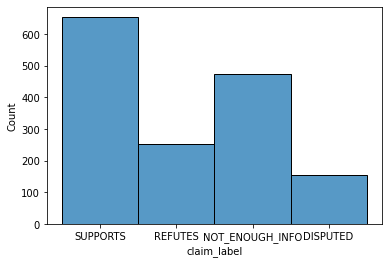

In [12]:
sns.histplot(df["claim_label"])

In [ ]:
X = df["claim"]
y = df["claim_label"]

<class 'pandas.core.series.Series'>


In [ ]:
df_encoded = pd.DataFrame()

le = LabelEncoder()
le.fit(["SUPPORTS", "NOT_ENOUGH_INFO", "REFUTES", "DISPUTED"])
y_encoded = le.transform(y)
df_encoded["claim_label"] = y_encoded


tfidf = TfidfVectorizer()
X_vect = tfidf.fit_transform(X.values)
print(X_vect[0][0])
df_encoded["claim"] = X_vect

print(df_encoded)

  (0, 1572)	0.4472440713322647
  (0, 4054)	0.4472440713322647
  (0, 548)	0.42228395773179467
  (0, 3013)	0.3527761958059569
  (0, 1339)	0.4580315363489802
  (0, 2192)	0.15270188206443677
  (0, 4272)	0.17448761407330426
  (0, 1824)	0.1833412541958475


AttributeError: values not found

In [ ]:

under_sampler = RandomUnderSampler(random_state=42)
X_dist, y_dist = under_sampler.fit_resample(np.array(y), np.array(y))

# df_dist = pd.DataFrame({df.columns[0] : X_dist, df.columns[1] : y_dist})
# df_dist.head()

In [ ]:

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=42)

<class 'pandas.core.series.Series'>


#Comments on the previous section.
This model overfits the training set and performs poorly on the validation set.